In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('flight_csv')
data

,Unnamed: 0,Unnamed: 0.1,flight_name,source,destination,no_of_stops,start_time,end_time,travel_time,price,date_of_journey,class
0,0,0,GO FIRST,Delhi,Mumbai,non-stop,07:15,09:20,02h 05m,"8,053",29/5/2022,Economy
1,1,1,GO FIRST,Delhi,Mumbai,non-stop,02:40,04:50,02h 10m,"8,053",29/5/2022,Economy
2,2,2,GO FIRST,Delhi,Mumbai,non-stop,06:00,08:10,02h 10m,"8,053",29/5/2022,Economy
3,3,3,GO FIRST,Delhi,Mumbai,non-stop,22:45,01:00,02h 15m,"8,053",29/5/2022,Economy
4,4,4,Indigo,Delhi,Mumbai,non-stop,02:00,04:10,02h 10m,"8,054",29/5/2022,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,3542,SpiceJet,Goa,Delhi,1-stop,08:15,07:45,23h 30m,"17,784",23/12/2022,economy
1821,1821,3543,SpiceJet,Goa,Delhi,1-stop,12:55,10:30,21h 35m,"18,176",23/12/2022,economy
1822,1822,3564,Vistara,Goa,Kolkata,1-stop,14:30,22:45,08h 15m,"65,283",24/01/2023,bussiness
1823,1823,3565,Vistara,Goa,Kolkata,1-stop,14:30,08:20,17h 50m,"65,283",24/01/2023,bussiness


In [3]:
data.shape

(1825, 12)

In [4]:
data.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
flight_name        0
source             0
destination        0
no_of_stops        0
start_time         0
end_time           0
travel_time        0
price              0
date_of_journey    0
class              0
dtype: int64

In [5]:
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   flight_name      1825 non-null   object
 1   source           1825 non-null   object
 2   destination      1825 non-null   object
 3   no_of_stops      1825 non-null   object
 4   start_time       1825 non-null   object
 5   end_time         1825 non-null   object
 6   travel_time      1825 non-null   object
 7   price            1825 non-null   object
 8   date_of_journey  1825 non-null   object
 9   class            1825 non-null   object
dtypes: object(10)
memory usage: 142.7+ KB


In [7]:
#observation
#all fetures are in the form of object type 
#price is in the object type we have to convert it into numeric type
#and date is also object type we have to convert it into datetime
#

In [8]:
price1=[]
for i in data['price']:
    price1.append(i.replace(',',''))
    
data['price']=price1


In [9]:
data['price'] = data['price'].astype("float")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_name      1825 non-null   object 
 1   source           1825 non-null   object 
 2   destination      1825 non-null   object 
 3   no_of_stops      1825 non-null   object 
 4   start_time       1825 non-null   object 
 5   end_time         1825 non-null   object 
 6   travel_time      1825 non-null   object 
 7   price            1825 non-null   float64
 8   date_of_journey  1825 non-null   object 
 9   class            1825 non-null   object 
dtypes: float64(1), object(9)
memory usage: 142.7+ KB


In [11]:
data['day']=pd.to_datetime(data.date_of_journey  , format='%d/%m/%Y').dt.day
data['month']=pd.to_datetime(data.date_of_journey  , format='%d/%m/%Y').dt.month
data['year']=pd.to_datetime(data.date_of_journey  , format='%d/%m/%Y').dt.year

In [12]:
data.head()

,flight_name,source,destination,no_of_stops,start_time,end_time,travel_time,price,date_of_journey,class,day,month,year
0,GO FIRST,Delhi,Mumbai,non-stop,07:15,09:20,02h 05m,8053.0,29/5/2022,Economy,29,5,2022
1,GO FIRST,Delhi,Mumbai,non-stop,02:40,04:50,02h 10m,8053.0,29/5/2022,Economy,29,5,2022
2,GO FIRST,Delhi,Mumbai,non-stop,06:00,08:10,02h 10m,8053.0,29/5/2022,Economy,29,5,2022
3,GO FIRST,Delhi,Mumbai,non-stop,22:45,01:00,02h 15m,8053.0,29/5/2022,Economy,29,5,2022
4,Indigo,Delhi,Mumbai,non-stop,02:00,04:10,02h 10m,8054.0,29/5/2022,Economy,29,5,2022


In [13]:
#year is not usefull for us because year not that much important so i can drop the year and date of journey feature
data.drop(['year','date_of_journey'],axis=1,inplace=True)

In [14]:
data.head()

,flight_name,source,destination,no_of_stops,start_time,end_time,travel_time,price,class,day,month
0,GO FIRST,Delhi,Mumbai,non-stop,07:15,09:20,02h 05m,8053.0,Economy,29,5
1,GO FIRST,Delhi,Mumbai,non-stop,02:40,04:50,02h 10m,8053.0,Economy,29,5
2,GO FIRST,Delhi,Mumbai,non-stop,06:00,08:10,02h 10m,8053.0,Economy,29,5
3,GO FIRST,Delhi,Mumbai,non-stop,22:45,01:00,02h 15m,8053.0,Economy,29,5
4,Indigo,Delhi,Mumbai,non-stop,02:00,04:10,02h 10m,8054.0,Economy,29,5


In [15]:
#for better understanding i have to change column names as start_time to departure_time and end_time to arrival time
data.rename(columns={'start_time':'departure_time','end_time':'arrival_time','travel_time':'duration'}, inplace=True)

In [16]:
data.head()

,flight_name,source,destination,no_of_stops,departure_time,arrival_time,duration,price,class,day,month
0,GO FIRST,Delhi,Mumbai,non-stop,07:15,09:20,02h 05m,8053.0,Economy,29,5
1,GO FIRST,Delhi,Mumbai,non-stop,02:40,04:50,02h 10m,8053.0,Economy,29,5
2,GO FIRST,Delhi,Mumbai,non-stop,06:00,08:10,02h 10m,8053.0,Economy,29,5
3,GO FIRST,Delhi,Mumbai,non-stop,22:45,01:00,02h 15m,8053.0,Economy,29,5
4,Indigo,Delhi,Mumbai,non-stop,02:00,04:10,02h 10m,8054.0,Economy,29,5


In [17]:
#iam seperating time into hours and minutes
data['dep_hours']=pd.to_datetime(data.departure_time).dt.hour
data['dep_mins']=pd.to_datetime(data.departure_time).dt.minute
data['arrv_hours']=pd.to_datetime(data.arrival_time).dt.hour
data['arrv_mins']=pd.to_datetime(data.arrival_time).dt.minute

#seperating duration hours and time
data['duration_hour']=data['duration'].str.split(' ').str[0].str.split('h').str[0]

data['duration_minutes']=data['duration'].str.split(' ').str[1].str.split('m').str[0]

In [18]:
data.head()

,flight_name,source,destination,no_of_stops,departure_time,arrival_time,duration,price,class,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,GO FIRST,Delhi,Mumbai,non-stop,07:15,09:20,02h 05m,8053.0,Economy,29,5,7,15,9,20,02,05
1,GO FIRST,Delhi,Mumbai,non-stop,02:40,04:50,02h 10m,8053.0,Economy,29,5,2,40,4,50,02,10
2,GO FIRST,Delhi,Mumbai,non-stop,06:00,08:10,02h 10m,8053.0,Economy,29,5,6,0,8,10,02,10
3,GO FIRST,Delhi,Mumbai,non-stop,22:45,01:00,02h 15m,8053.0,Economy,29,5,22,45,1,0,02,15
4,Indigo,Delhi,Mumbai,non-stop,02:00,04:10,02h 10m,8054.0,Economy,29,5,2,0,4,10,02,10


In [19]:
#droping duplicate columns 
data.drop(['departure_time','arrival_time','duration'],axis=1,inplace=True)

In [20]:
data.head()

,flight_name,source,destination,no_of_stops,price,class,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,GO FIRST,Delhi,Mumbai,non-stop,8053.0,Economy,29,5,7,15,9,20,02,05
1,GO FIRST,Delhi,Mumbai,non-stop,8053.0,Economy,29,5,2,40,4,50,02,10
2,GO FIRST,Delhi,Mumbai,non-stop,8053.0,Economy,29,5,6,0,8,10,02,10
3,GO FIRST,Delhi,Mumbai,non-stop,8053.0,Economy,29,5,22,45,1,0,02,15
4,Indigo,Delhi,Mumbai,non-stop,8054.0,Economy,29,5,2,0,4,10,02,10


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_name       1825 non-null   object 
 1   source            1825 non-null   object 
 2   destination       1825 non-null   object 
 3   no_of_stops       1825 non-null   object 
 4   price             1825 non-null   float64
 5   class             1825 non-null   object 
 6   day               1825 non-null   int64  
 7   month             1825 non-null   int64  
 8   dep_hours         1825 non-null   int64  
 9   dep_mins          1825 non-null   int64  
 10  arrv_hours        1825 non-null   int64  
 11  arrv_mins         1825 non-null   int64  
 12  duration_hour     1825 non-null   object 
 13  duration_minutes  1825 non-null   object 
dtypes: float64(1), int64(6), object(7)
memory usage: 199.7+ KB


In [22]:
data['duration_hour']=data['duration_hour'].astype('float')
data['duration_minutes']=data['duration_minutes'].astype('float')

In [23]:
data['flight_name'].value_counts()

Vistara     1129
Indigo       653
GO FIRST      20
SpiceJet      16
AirAsia        7
Name: flight_name, dtype: int64

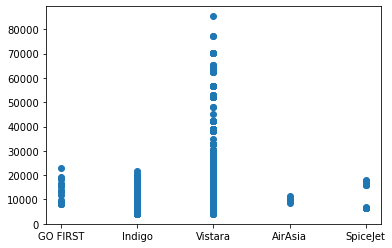

In [24]:
plt.scatter(x='flight_name',y='price',data=data)

In [25]:
#observation
#the price of the ticket is high in the vistara flights 
#low in airasia

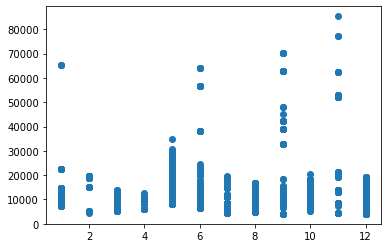

In [26]:
plt.scatter(x='month',y='price',data=data)

In [27]:
#observtion
#price is high in the months of 9 and 11
# low price exists in 4 month

In [28]:
data['class'].value_counts()

economy        1244
Economy         303
bussiness       105
Bussiness        78
Pre_Economy      49
pre_economy      46
Name: class, dtype: int64

In [29]:
data['class']=data['class'].replace({'economy':'Economy','bussiness':'Bussiness','pre_economy':'Pre_Economy'})

In [30]:
data['class'].value_counts()

Economy        1547
Bussiness       183
Pre_Economy      95
Name: class, dtype: int64

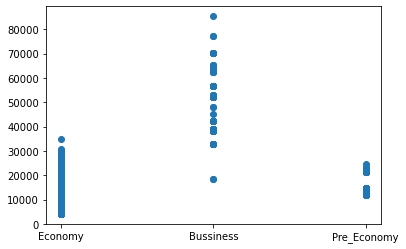

In [31]:
plt.scatter(x='class',y='price',data=data)

In [32]:
#observation 
# bussiness class has high in price minimum price of bussiness class is nearly 20k we can see in the above plot
# minimum rate is low in economy class and in the economy class also price is high but not as in bussiness class
#minimum price of the pre_economy class is nearly 15k 

In [33]:
data['no_of_stops'].value_counts()

1-stop               1446
non-stop              319
2+-stop                58
1-stop Via Delhi        1
1-stop Via Mumbai       1
Name: no_of_stops, dtype: int64

In [34]:
data['no_of_stops']=data['no_of_stops'].replace({'1-stop':1,'non-stop':0,'1-stop Via Mumbai':1,'1-stop Via Delhi':1,'2+-stop':2})

In [35]:
data['no_of_stops'].value_counts()

1    1448
0     319
2      58
Name: no_of_stops, dtype: int64

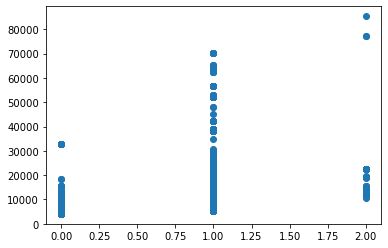

In [36]:
plt.scatter(x='no_of_stops',y='price',data=data)

In [37]:
#observation 
# the price is high in no of stops is 1 and also 2 as well
#but when no of stops is zero the price is not that much high

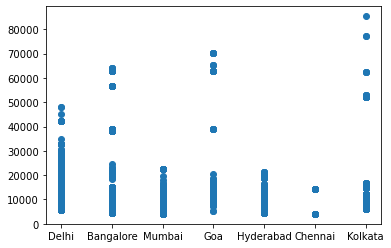

In [38]:
plt.scatter(x='source',y='price',data=data)

In [39]:
#observation
#kolkatha and goa and bengalore has high price in source

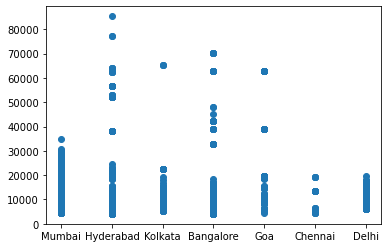

In [40]:
plt.scatter(x='destination',y='price',data=data)

In [41]:
#observation

#Hyderabad has high price in the destination
#chennai has low price 

In [42]:
data.head()

,flight_name,source,destination,no_of_stops,price,class,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,7,15,9,20,2.0,5.0
1,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,2,40,4,50,2.0,10.0
2,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,6,0,8,10,2.0,10.0
3,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,22,45,1,0,2.0,15.0
4,Indigo,Delhi,Mumbai,0,8054.0,Economy,29,5,2,0,4,10,2.0,10.0


<AxesSubplot:xlabel='dep_hours', ylabel='price'>

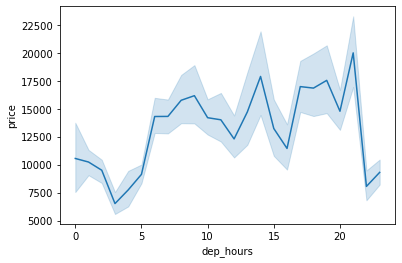

In [43]:
sns.lineplot(x='dep_hours',y='price',data=data)

In [44]:
#observation
#price is low in the time of arrival is 3 and high in 20 hours

<AxesSubplot:xlabel='arrv_hours', ylabel='price'>

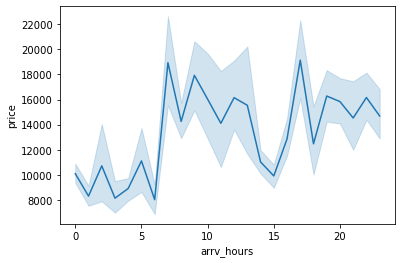

In [45]:
sns.lineplot(x='arrv_hours',y='price',data=data)

In [46]:
#observation
#price is high in the arrival time of 5 price is low in 15

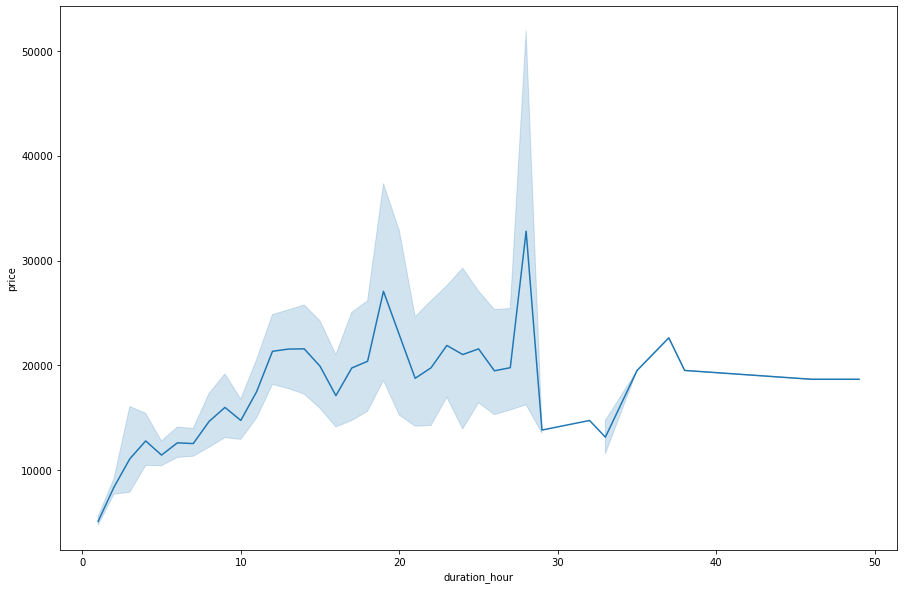

In [47]:
plt.figure(figsize=(15,10))
sns.lineplot(x='duration_hour',y='price',data=data)
plt.show()

In [48]:
#observation 
#when time increases price is also increases we can see in the above plot

<AxesSubplot:xlabel='price', ylabel='Density'>

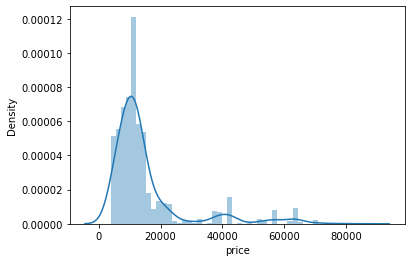

In [49]:
sns.distplot(data['price'])

In [50]:
#it is skewed right +vely since difference between minimum and maximum price high

In [51]:
data.head()

,flight_name,source,destination,no_of_stops,price,class,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,7,15,9,20,2.0,5.0
1,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,2,40,4,50,2.0,10.0
2,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,6,0,8,10,2.0,10.0
3,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,22,45,1,0,2.0,15.0
4,Indigo,Delhi,Mumbai,0,8054.0,Economy,29,5,2,0,4,10,2.0,10.0


# encoding the categorical features

In [52]:
data.head()

,flight_name,source,destination,no_of_stops,price,class,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,7,15,9,20,2.0,5.0
1,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,2,40,4,50,2.0,10.0
2,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,6,0,8,10,2.0,10.0
3,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,22,45,1,0,2.0,15.0
4,Indigo,Delhi,Mumbai,0,8054.0,Economy,29,5,2,0,4,10,2.0,10.0


In [53]:
data1=pd.get_dummies(data[['flight_name','source','destination','class']],drop_first=True)
data1.head()

,flight_name_GO FIRST,flight_name_Indigo,flight_name_SpiceJet,flight_name_Vistara,source_Chennai,source_Delhi,source_Goa,source_Hyderabad,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Goa,destination_Hyderabad,destination_Kolkata,destination_Mumbai,class_Economy,class_Pre_Economy
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [54]:
data_final=pd.concat([data,data1],axis=1)
data_final

,flight_name,source,destination,no_of_stops,price,class,day,month,dep_hours,dep_mins,...,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Goa,destination_Hyderabad,destination_Kolkata,destination_Mumbai,class_Economy,class_Pre_Economy
0,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,7,15,...,0,0,0,0,0,0,0,1,1,0
1,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,2,40,...,0,0,0,0,0,0,0,1,1,0
2,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,6,0,...,0,0,0,0,0,0,0,1,1,0
3,GO FIRST,Delhi,Mumbai,0,8053.0,Economy,29,5,22,45,...,0,0,0,0,0,0,0,1,1,0
4,Indigo,Delhi,Mumbai,0,8054.0,Economy,29,5,2,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,SpiceJet,Goa,Delhi,1,17784.0,Economy,23,12,8,15,...,0,0,0,1,0,0,0,0,1,0
1821,SpiceJet,Goa,Delhi,1,18176.0,Economy,23,12,12,55,...,0,0,0,1,0,0,0,0,1,0
1822,Vistara,Goa,Kolkata,1,65283.0,Bussiness,24,1,14,30,...,0,0,0,0,0,0,1,0,0,0
1823,Vistara,Goa,Kolkata,1,65283.0,Bussiness,24,1,14,30,...,0,0,0,0,0,0,1,0,0,0


In [55]:
data_final.drop(['flight_name','source','destination','class'],axis=1,inplace=True)
data_final

,no_of_stops,price,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes,...,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Goa,destination_Hyderabad,destination_Kolkata,destination_Mumbai,class_Economy,class_Pre_Economy
0,0,8053.0,29,5,7,15,9,20,2.0,5.0,...,0,0,0,0,0,0,0,1,1,0
1,0,8053.0,29,5,2,40,4,50,2.0,10.0,...,0,0,0,0,0,0,0,1,1,0
2,0,8053.0,29,5,6,0,8,10,2.0,10.0,...,0,0,0,0,0,0,0,1,1,0
3,0,8053.0,29,5,22,45,1,0,2.0,15.0,...,0,0,0,0,0,0,0,1,1,0
4,0,8054.0,29,5,2,0,4,10,2.0,10.0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1,17784.0,23,12,8,15,7,45,23.0,30.0,...,0,0,0,1,0,0,0,0,1,0
1821,1,18176.0,23,12,12,55,10,30,21.0,35.0,...,0,0,0,1,0,0,0,0,1,0
1822,1,65283.0,24,1,14,30,22,45,8.0,15.0,...,0,0,0,0,0,0,1,0,0,0
1823,1,65283.0,24,1,14,30,8,20,17.0,50.0,...,0,0,0,0,0,0,1,0,0,0


In [56]:
continous_features=data[['price','day','month','dep_hours','dep_mins','arrv_hours','arrv_mins','duration_hour','duration_minutes']]

In [57]:
continous_features

,price,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes
0,8053.0,29,5,7,15,9,20,2.0,5.0
1,8053.0,29,5,2,40,4,50,2.0,10.0
2,8053.0,29,5,6,0,8,10,2.0,10.0
3,8053.0,29,5,22,45,1,0,2.0,15.0
4,8054.0,29,5,2,0,4,10,2.0,10.0
...,...,...,...,...,...,...,...,...,...
1820,17784.0,23,12,8,15,7,45,23.0,30.0
1821,18176.0,23,12,12,55,10,30,21.0,35.0
1822,65283.0,24,1,14,30,22,45,8.0,15.0
1823,65283.0,24,1,14,30,8,20,17.0,50.0


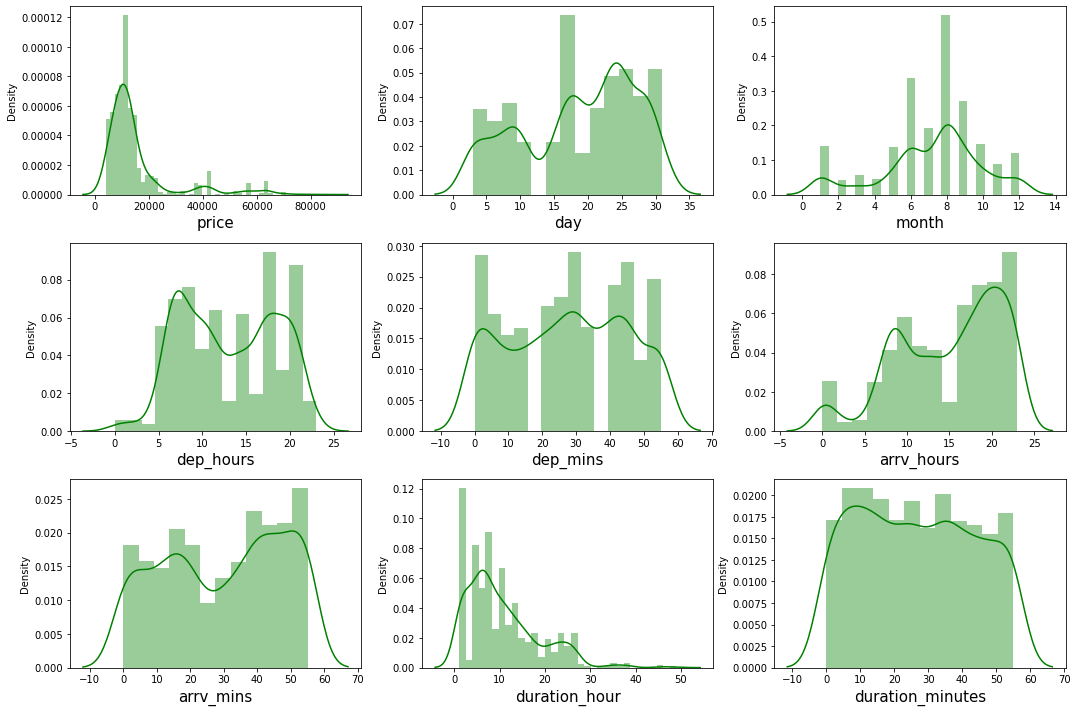

In [58]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in continous_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(continous_features[column],color='green')
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
    
plt.tight_layout()

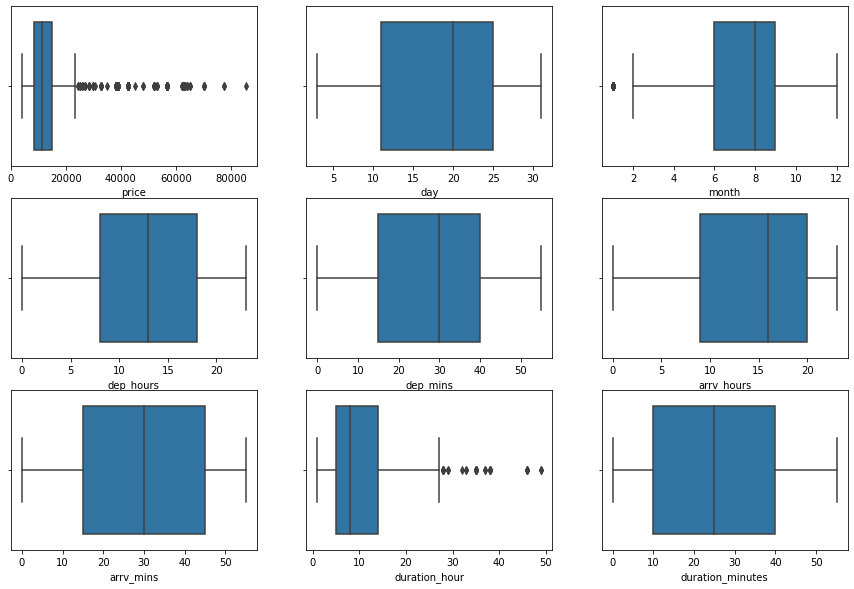

In [59]:
plt.figure(figsize=(15,10))
graph=1

for column in continous_features:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(continous_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [60]:
#price is showing some outliers but in the bussiness class prices are very high compared to economy so we cannot say these are the outliers 
#duration hours has outliers since no of stops increases time is also incereases so we cannot say these are outliers

In [61]:
data_final.skew()

no_of_stops              -0.750766
price                     2.564862
day                      -0.451210
month                    -0.569873
dep_hours                -0.003527
dep_mins                 -0.074922
arrv_hours               -0.582529
arrv_mins                -0.162385
duration_hour             1.185437
duration_minutes          0.087820
flight_name_GO FIRST      9.402467
flight_name_Indigo        0.593751
flight_name_SpiceJet     10.547710
flight_name_Vistara      -0.488870
source_Chennai            8.044499
source_Delhi              1.347191
source_Goa                4.087151
source_Hyderabad          2.293552
source_Kolkata            2.196808
source_Mumbai             1.382191
destination_Chennai       7.017360
destination_Delhi         1.290679
destination_Goa           2.847343
destination_Hyderabad     1.839786
destination_Kolkata       2.066904
destination_Mumbai        1.562553
class_Economy            -1.936650
class_Pre_Economy         4.036362
dtype: float64

In [62]:
#since we consider skewness for only continous features so iam adjusting skewness for following features 
data_final['duration_hour']=np.log(data_final['duration_hour'])

In [63]:
data_final['duration_hour'].skew()

-0.5753608512745294

In [64]:
data_final.columns

Index(['no_of_stops', 'price', 'day', 'month', 'dep_hours', 'dep_mins',
       'arrv_hours', 'arrv_mins', 'duration_hour', 'duration_minutes',
       'flight_name_GO FIRST', 'flight_name_Indigo', 'flight_name_SpiceJet',
       'flight_name_Vistara', 'source_Chennai', 'source_Delhi', 'source_Goa',
       'source_Hyderabad', 'source_Kolkata', 'source_Mumbai',
       'destination_Chennai', 'destination_Delhi', 'destination_Goa',
       'destination_Hyderabad', 'destination_Kolkata', 'destination_Mumbai',
       'class_Economy', 'class_Pre_Economy'],
      dtype='object')

<AxesSubplot:>

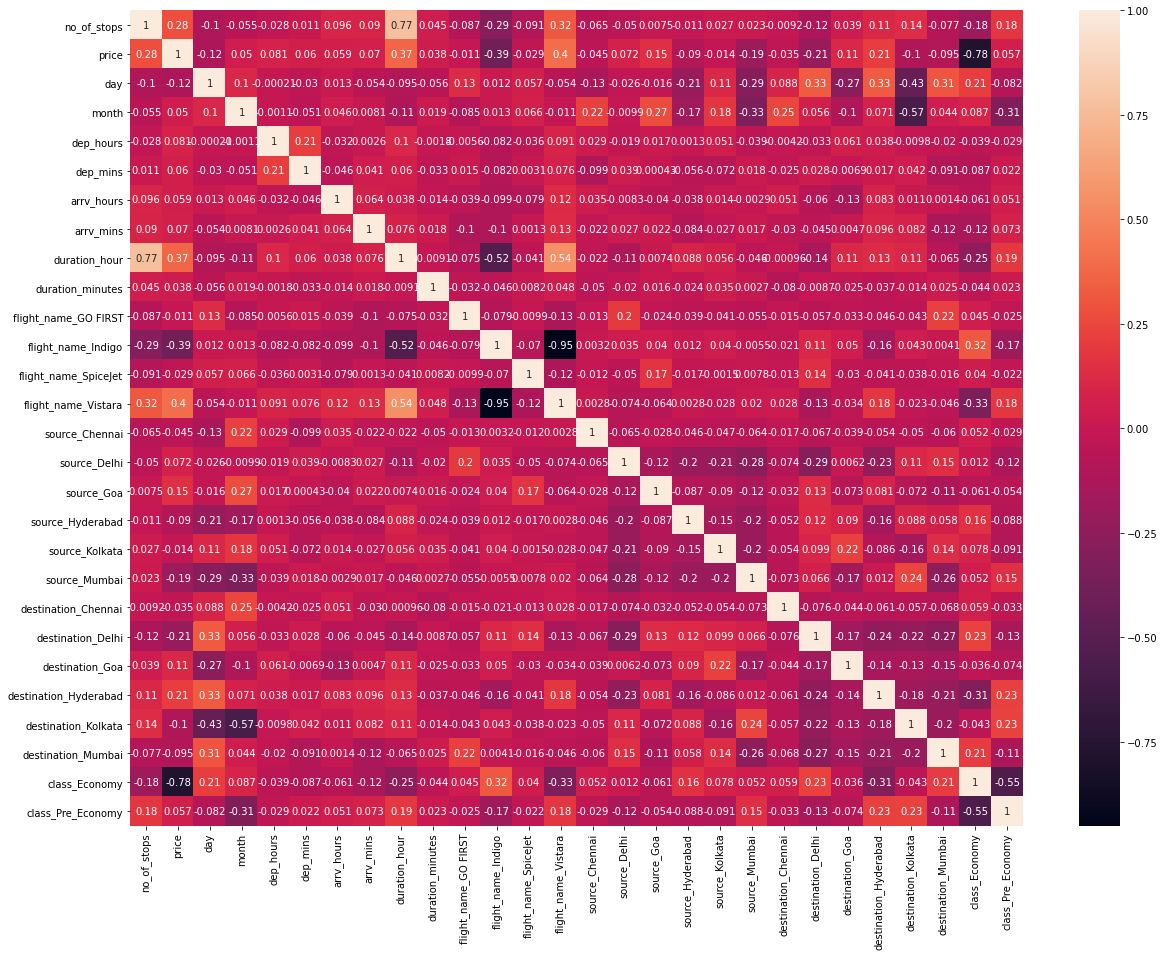

In [65]:
plt.figure(figsize=(20,15))
sns.heatmap(data_final.corr(),annot=True,linecolor='black')

In [66]:
#observation
#flight name vistara and indigo are hoghly negatively correlated 
# so i can drop indigo from the data set
data_final.drop('flight_name_Indigo',axis=1,inplace=True)
data_final.shape

(1825, 27)

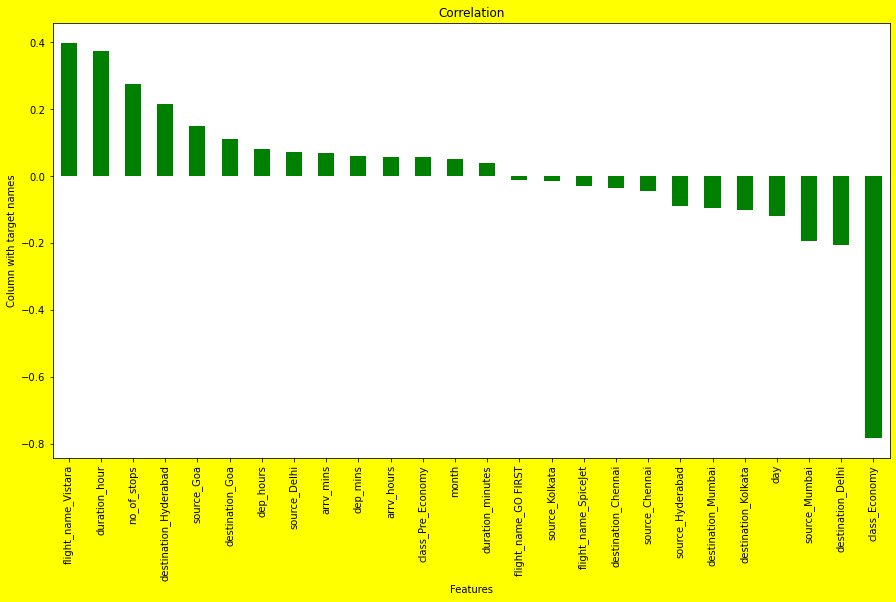

In [67]:
plt.figure(figsize =(15, 8),facecolor='yellow')
data_final.corr()['price'].sort_values(ascending = False).drop(['price']).plot(kind ='bar', color ='green')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()


In [ ]:
#observation 
#class economy is highly negatively correlated with our target variable
#duration hour is highly ositively correlates with the price

# model building 

In [68]:
X=data_final.drop('price',axis=1)
y=data_final['price']

In [69]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
x=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
x

,no_of_stops,day,month,dep_hours,dep_mins,arrv_hours,arrv_mins,duration_hour,duration_minutes,flight_name_GO FIRST,...,source_Kolkata,source_Mumbai,destination_Chennai,destination_Delhi,destination_Goa,destination_Hyderabad,destination_Kolkata,destination_Mumbai,class_Economy,class_Pre_Economy
0,0.0,0.928571,0.363636,0.304348,0.272727,0.391304,0.363636,0.178104,0.090909,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.928571,0.363636,0.086957,0.727273,0.173913,0.909091,0.178104,0.181818,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.928571,0.363636,0.260870,0.000000,0.347826,0.181818,0.178104,0.181818,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.928571,0.363636,0.956522,0.818182,0.043478,0.000000,0.178104,0.272727,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.928571,0.363636,0.086957,0.000000,0.173913,0.181818,0.178104,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0.5,0.714286,1.000000,0.347826,0.272727,0.304348,0.818182,0.805663,0.545455,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1821,0.5,0.714286,1.000000,0.521739,1.000000,0.434783,0.545455,0.782288,0.636364,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1822,0.5,0.750000,0.000000,0.608696,0.545455,0.956522,0.818182,0.534311,0.272727,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1823,0.5,0.750000,0.000000,0.608696,0.545455,0.347826,0.363636,0.727992,0.909091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

In [71]:
Maxaccu=0
maxrs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    predx=lr.predict(x_test)
    acc=r2_score(y_test,predx)
    if acc>Maxaccu:
        Maxaccu=acc
        maxrs=i
        
print('max r2score is',Maxaccu,'on random state of',maxrs)
        

max r2score is 0.9179893025161978 on random state of 187


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=181)

In [81]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    clf.fit(x,y)
    if train:
        y_pred=clf.predict(x_train)
        print('=======train results===========')
        print('\n')
        print(f'accuracy score:{r2_score(y_train,y_pred)*100:2f}%')
        print('\n')
   
    elif train==False:
        pred=clf.predict(x_test)
        print('=======test results=========')
        print('\n')
        print(f"r2score is:{r2_score(y_test,pred)*100:2f}%")
        print('\n')
        
def kfolds(clf, clf_name):
    clf = cross_val_score(clf, x,y, cv=10)
    clf_score = np.average(clf)
    print(f"{clf_name} score on cross validation: {clf_score * 100}%")

In [82]:
#linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)

kfolds(lr,'linearRegression')

=======train results===========


accuracy score:88.156620%


=======test results=========


r2score is:92.209911%


linearRegression score on cross validation: 3.5684500133564443%


In [83]:
#random Forest
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test,train=True)
print_score(rfc,x_train,x_test,y_train,y_test,train=False)

kfolds(rfc,'RandomForestRegressor')

=======train results===========


accuracy score:99.430319%


=======test results=========


r2score is:99.690018%


RandomForestRegressor score on cross validation: 42.42442492709513%


In [84]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print_score(gbr,x_train,x_test,y_train,y_test,train=True)
print_score(gbr,x_train,x_test,y_train,y_test,train=False)

kfolds(gbr,'GradientBoostingRegressor')

=======train results===========


accuracy score:95.361775%


=======test results=========


r2score is:97.289242%


GradientBoostingRegressor score on cross validation: 55.45127553504513%


In [85]:
#BaggingRegressor
from sklearn.ensemble import BaggingRegressor
bgr=BaggingRegressor()
bgr.fit(x_train,y_train)


print_score(bgr,x_train,x_test,y_train,y_test,train=True)
print_score(bgr,x_train,x_test,y_train,y_test,train=False)

kfolds(bgr,'BaggingRegressor')

=======train results===========


accuracy score:99.276332%


=======test results=========


r2score is:99.449350%


BaggingRegressor score on cross validation: 42.67548011376949%


In [86]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(dtr,'DecisionTreeRegressor')

=======train results===========


accuracy score:99.980453%


=======test results=========


r2score is:100.000000%


DecisionTreeRegressor score on cross validation: 0.9756739783514999%


In [87]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test,train=True)
print_score(dtr,x_train,x_test,y_train,y_test,train=False)

kfolds(xgbr,'XGBRegressor')

=======train results===========


accuracy score:99.980453%


=======test results=========


r2score is:100.000000%


XGBRegressor score on cross validation: 53.32995463202626%


mean absolute error is: 1609.0346192476538


mean squared error is: 6132883.394202896


Root mean suared error is: 2476.4659081446885


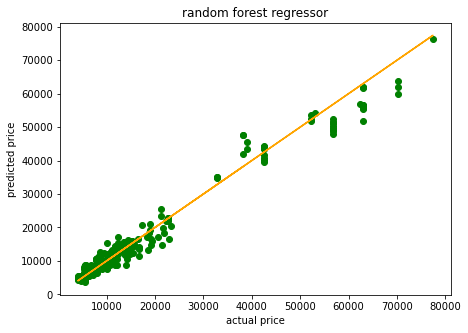

In [88]:
#random forest
y_pred=gbr.predict(x_train)
pred=gbr.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('random forest regressor')
plt.show()

mean absolute error is: 1313.5673888324059


mean squared error is: 4416368.301902109


Root mean suared error is: 2101.5157153592995


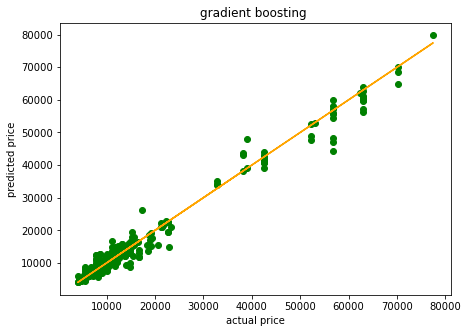

In [89]:
#gradient boosting regressor

y_pred=xgbr.predict(x_train)
pred=xgbr.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print('mean absolute error is:',mean_absolute_error(y_test,pred))
print('\n')
print('mean squared error is:',mean_squared_error(y_test,pred))
print('\n')
print('Root mean suared error is:',np.sqrt(mean_squared_error(y_test,pred)))

plt.figure(figsize=(7,5))
plt.scatter(x=y_test,y=pred,color='green')
plt.plot(y_test,y_test,color='orange')
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('gradient boosting ')
plt.show()

In [90]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

print_score(gbr,x_train,x_test,y_train,y_test,train=True)
print_score(gbr,x_train,x_test,y_train,y_test,train=False)

kfolds(gbr,'GradientBoostingRegressor')

=======train results===========


accuracy score:95.361775%


=======test results=========


r2score is:97.289242%


GradientBoostingRegressor score on cross validation: 53.726312949278764%


In [91]:
#regularization
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[0.001,1,0.1],'random_state':[1,3,5,6,7,9,8,10]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 1}


In [92]:
ls=Lasso(alpha=1,random_state=1)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)

lss

0.9130479545591774

In [93]:
cv_score=cross_val_score(ls,x,y,cv=10).mean()
cv_score

0.061028361352139834

In [126]:
#hyper parameter tunning
from sklearn.ensemble import GradientBoostingRegressor          
gbr=GradientBoostingRegressor()


parameters={'n_estimators':[15,20],
            'loss':['squared_error','absolute_error','huber','quantile'],
            'learning_rate':[0.1,0.01],
            'max_depth':[5,7],
            'min_samples_split':[4,6],
            'min_samples_leaf':[2,3,5],
            'max_features':['auto','sqrt','log2']}

clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 20}


In [94]:
gbr=GradientBoostingRegressor(loss='squared_error',learning_rate=0.1,max_features='auto',max_depth=7,min_samples_leaf=3,min_samples_split=4,n_estimators=20)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred=gbr.predict(x_test)

gbs=r2_score(y_test,pred)
print('r2score',gbs*100)

gbcscore=cross_val_score(gbr,x,y,cv=5).mean()
print('cross validation score is',gbcscore*100)

r2score 94.33673139861507
cross validation score is 31.351596380240167


In [150]:
#save the model
import joblib
joblib.dump(gbr,'flight price prediction_flip.obj')

['flight price prediction_flip.obj']

In [152]:
#model predictions
model=joblib.load('flight price prediction_flip.obj')
pred=model.predict(x_test)
predict_values=pd.DataFrame({'actual':y_test,'predict':pred})

In [153]:
predict_values

,actual,predict
140,10.550067,10.410191
1564,8.751316,8.835133
487,8.709300,8.857727
523,9.351840,9.439086
346,8.952605,9.343907
...,...,...
1594,9.086929,9.163031
1624,9.220192,9.124091
1300,9.346967,9.321537
256,8.718009,8.893753
